In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
cost_mu, cost_sigma = 500, 75

def A(t):
    return np.random.normal(cost_mu, cost_sigma)

def B(t):
    return np.random.normal(cost_mu * 0.8, cost_sigma)

def C(t):
    return np.random.normal(cost_mu * 0.6, cost_sigma)

In [31]:
def getRewards(prices_arr):
    k = [None] * len(prices_arr) 
    for i in range(len(prices_arr)):
        if prices_arr[i] == min(prices_arr):
            k[i] = 1
        elif prices_arr[i] == max(prices_arr):
            k[i] = 0
        else:
            k[i] = 0.5
    return k

def bestActionAccumulatedReward(prices_arr):
    print(np.sum(prices_arr,axis=0))
    return np.max(np.sum(prices_arr,axis=0))

In [32]:
T = 2000
K = 3

weight=[1,1,1]
prob=[[1] * K for x in range(0,T+2)] # 0: use origin, 1: use card

rewards=[[0,0,0]]

rewards_exp3 = [0]
regrets_exp3 = [0]

actions_exp3=[-1]

gamma = 0.05

z=[]
z_weight=[]

best_action_accumulated_reward = 0

for i in range(1,T+1):
    rewards.append(getRewards([A(i), B(i), C(i)]))
    best_action_accumulated_reward = bestActionAccumulatedReward(rewards)
    
    # exp3
    for arm in range(K):
        prob[i][arm] = (1 - gamma)*(weight[arm])/np.sum(weight) + gamma/K
        
    prob[i]=prob[i]/np.sum(prob[i]) 
    print((1 - gamma)*(weight[arm])/np.sum(weight),gamma/K,prob[i])
        
    draw = int(np.random.choice([0,1,2], 1, p=np.array(prob[i]/np.sum(prob[i])) )) # normolize
    
    actions_exp3.append(draw)
    observed_reward = rewards[i][draw]

    rewards_exp3.append(observed_reward) # play arm, get a reward
               
    weak_regret = best_action_accumulated_reward - sum(rewards_exp3) # weak_regret >= 0
    #print(best_action_accumulated_reward -sum(rewards_exp3),"action:", draw)
        
    regrets_exp3.append(weak_regret) # observe a regret

    x = rewards_exp3[i] / prob[i][draw]
    weight[draw] = weight[draw]*np.exp(gamma*x/K)
    weight= weight / np.sum(weight)
    
    #print(weight)
    
    z.append({"t": i, "reward": rewards_exp3[i], "regret": weak_regret,
              "action": draw, "action_group": chr(draw+65) ,"method": "exp3"})
    
    for arm in range(K):
        z_weight.append({"t": i, "weight": weight[arm], "legend": chr(int(arm)+65)})

df=pd.DataFrame(z)
df_weight=pd.DataFrame(z_weight)

[0.  0.5 1. ]
0.31666666666666665 0.016666666666666666 [0.33333333 0.33333333 0.33333333]
[0. 1. 2.]
0.3273086887439735 0.016666666666666666 [0.32801232 0.32801232 0.34397536]
[0.  1.5 3. ]
0.3377806099675584 0.016666666666666666 [0.32277636 0.32277636 0.35444728]
[0. 2. 4.]
0.3377806099675584 0.016666666666666666 [0.32277636 0.32277636 0.35444728]
[0.  2.5 5. ]
0.3480843400052024 0.016666666666666666 [0.3176245  0.3176245  0.36475101]
[0. 3. 6.]
0.3582218662773358 0.016666666666666666 [0.31255573 0.31255573 0.37488853]
[0.5 3.  7. ]
0.3681952372902585 0.016666666666666666 [0.30756905 0.30756905 0.3848619 ]
[0.5 3.5 8. ]
0.365124536315085 0.016666666666666666 [0.31306584 0.30514296 0.3817912 ]
[0.5 4.  9. ]
0.365124536315085 0.016666666666666666 [0.31306584 0.30514296 0.3817912 ]
[ 0.5  4.5 10. ]
0.37498580102928414 0.016666666666666666 [0.30806841 0.30027912 0.39165247]
[ 0.5  5.  11. ]
0.37186175786109554 0.016666666666666666 [0.30564072 0.30583086 0.38852842]
[ 1.  6. 11.]
0.3816133

[ 19.5 115.5 190.5]
0.7290988743627944 0.016666666666666666 [0.04956073 0.20467373 0.74576554]
[ 19.5 116.  191.5]
0.7328650530199461 0.016666666666666666 [0.04899991 0.20146837 0.74953172]
[ 19.5 116.5 192.5]
0.7365672343689874 0.016666666666666666 [0.04844863 0.19831747 0.7532339 ]
[ 19.5 117.  193.5]
0.7402064966257821 0.016666666666666666 [0.04790671 0.19522013 0.75687316]
[ 19.5 117.5 194.5]
0.7437839002876282 0.016666666666666666 [0.047374   0.19217543 0.76045057]
[ 19.5 118.  195.5]
0.7377436933991796 0.016666666666666666 [0.04712463 0.19846501 0.75441036]
[ 19.5 118.5 196.5]
0.7413629596681007 0.016666666666666666 [0.04660528 0.19536509 0.75802963]
[ 19.5 119.  197.5]
0.7353352865342487 0.016666666666666666 [0.04636187 0.20163618 0.75200195]
[ 19.5 119.5 198.5]
0.7389954869290081 0.016666666666666666 [0.04585554 0.19848231 0.75566215]
[ 19.5 120.  199.5]
0.7425934757692283 0.016666666666666666 [0.04535782 0.19538204 0.75926014]
[ 20.  120.  200.5]
0.7461303019114184 0.016666666

[ 30.5 168.5 290. ]
0.8405336071822074 0.016666666666666666 [0.02858646 0.11421327 0.85720027]
[ 30.5 169.5 290.5]
0.8424026885614723 0.016666666666666666 [0.02838293 0.11254771 0.85906936]
[ 30.5 170.  291.5]
0.8433247470477332 0.016666666666666666 [0.02828253 0.11172606 0.85999141]
[ 30.5 171.  292. ]
0.8451462297168062 0.016666666666666666 [0.02808419 0.11010292 0.8618129 ]
[ 30.5 171.5 293. ]
0.8460448196730785 0.016666666666666666 [0.02798634 0.10930217 0.86271149]
[ 30.5 172.  294. ]
0.847819912270019 0.016666666666666666 [0.02779305 0.10772037 0.86448658]
[ 30.5 172.5 295. ]
0.8413340108150307 0.016666666666666666 [0.02770793 0.11429139 0.85800068]
[ 31.  173.5 295. ]
0.8348450316324143 0.016666666666666666 [0.02762278 0.12086553 0.8515117 ]
[ 31. 174. 296.]
0.8348450316324143 0.016666666666666666 [0.02762278 0.12086553 0.8515117 ]
[ 31.  174.5 297. ]
0.8368111123640978 0.016666666666666666 [0.02743572 0.1190865  0.85347778]
[ 31. 175. 298.]
0.8368111123640978 0.0166666666666666

[ 38.  212.5 372. ]
0.8966052964942925 0.016666666666666666 [0.0199646  0.06676344 0.91327196]
[ 38. 213. 373.]
0.8975175370185474 0.016666666666666666 [0.01990825 0.06590754 0.9141842 ]
[ 38.  213.5 374. ]
0.8912909424005019 0.016666666666666666 [0.01988576 0.07215663 0.90795761]
[ 38. 214. 375.]
0.8922939234138313 0.016666666666666666 [0.01983077 0.07120864 0.90896059]
[ 38.  214.5 376. ]
0.8932797797272743 0.016666666666666666 [0.01977671 0.07027684 0.90994645]
[ 38.  215.5 376.5]
0.8942488033590189 0.016666666666666666 [0.01972358 0.06936095 0.91091547]
[ 38.5 215.5 377.5]
0.894726967249907 0.016666666666666666 [0.01969736 0.068909   0.91139363]
[ 38.5 216.5 378. ]
0.8956712806968954 0.016666666666666666 [0.01964559 0.06801647 0.91233795]
[ 38.5 217.5 378.5]
0.8961372544845063 0.016666666666666666 [0.01962004 0.06757604 0.91280392]
[ 38.5 218.5 379. ]
0.8829029961845025 0.016666666666666666 [0.01957642 0.08085392 0.89956966]
[ 38.5 219.  380. ]
0.8834783690336493 0.0166666666666666

[ 55.5 298.5 511.5]
0.9269019289137368 0.016666666666666666 [0.01752919 0.03890221 0.9435686 ]
[ 55.5 299.  512.5]
0.9272966734798266 0.016666666666666666 [0.01751445 0.03852221 0.94396334]
[ 55.5 299.5 513.5]
0.9276846733413594 0.016666666666666666 [0.01749996 0.0381487  0.94435134]
[ 55.5 300.  514.5]
0.9280660436895617 0.016666666666666666 [0.01748572 0.03778157 0.94473271]
[ 55.5 300.5 515.5]
0.9284408977501079 0.016666666666666666 [0.01747172 0.03742071 0.94510756]
[ 55.5 301.  516.5]
0.9288093468165961 0.016666666666666666 [0.01745796 0.03706602 0.94547601]
[ 55.5 301.5 517.5]
0.9291715002834559 0.016666666666666666 [0.01744444 0.03671739 0.94583817]
[ 56.  301.5 518.5]
0.9295274656782976 0.016666666666666666 [0.01743115 0.03637472 0.94619413]
[ 56.5 302.5 518.5]
0.9298773486937136 0.016666666666666666 [0.01741808 0.0360379  0.94654402]
[ 57.  302.5 519.5]
0.9298773486937136 0.016666666666666666 [0.01741808 0.0360379  0.94654402]
[ 58.  302.5 520. ]
0.9298773486937136 0.016666666

[ 74.5 376.5 648.5]
0.9424611730576923 0.016666666666666666 [0.01675144 0.02412072 0.95912784]
[ 74.5 377.  649.5]
0.9425900298694542 0.016666666666666666 [0.01674999 0.02399331 0.9592567 ]
[ 74.5 377.5 650.5]
0.9427166843562189 0.016666666666666666 [0.01674856 0.02386808 0.95938335]
[ 74.5 378.  651.5]
0.9397400739545708 0.016666666666666666 [0.01674831 0.02684495 0.95640674]
[ 75.  378.  652.5]
0.9397400739545708 0.016666666666666666 [0.01674831 0.02684495 0.95640674]
[ 75.5 378.  653.5]
0.9399154365411683 0.016666666666666666 [0.01674691 0.02667099 0.9565821 ]
[ 75.5 378.5 654.5]
0.9400878021110499 0.016666666666666666 [0.01674554 0.02649999 0.95675447]
[ 75.5 379.  655.5]
0.9402572218748597 0.016666666666666666 [0.01674419 0.02633192 0.95692389]
[ 76.  379.  656.5]
0.9404237461685244 0.016666666666666666 [0.01674287 0.02616672 0.95709041]
[ 76.  379.5 657.5]
0.9404237461685244 0.016666666666666666 [0.01674287 0.02616672 0.95709041]
[ 76.  380.5 658. ]
0.9405874244681831 0.016666666

[ 91.  447.5 775.5]
0.9432263260777604 0.016666666666666666 [0.01668467 0.02342234 0.95989299]
[ 91.5 447.5 776.5]
0.9433421053849147 0.016666666666666666 [0.01668436 0.02330687 0.96000877]
[ 91.5 448.  777.5]
0.9434559058502928 0.016666666666666666 [0.01668406 0.02319337 0.96012257]
[ 92.5 448.5 777.5]
0.943567761291138 0.016666666666666666 [0.01668376 0.02308181 0.96023443]
[ 92.5 449.  778.5]
0.943567761291138 0.016666666666666666 [0.01668376 0.02308181 0.96023443]
[ 93.  449.  779.5]
0.9436777049469183 0.016666666666666666 [0.01668347 0.02297216 0.96034437]
[ 93.  449.5 780.5]
0.9437857694891928 0.016666666666666666 [0.01668318 0.02286438 0.96045244]
[ 93.  450.  781.5]
0.9438919870313098 0.016666666666666666 [0.0166829  0.02275845 0.96055865]
[ 93.  450.5 782.5]
0.9439963891379398 0.016666666666666666 [0.01668262 0.02265432 0.96066306]
[ 93.  451.5 783. ]
0.9413583658796717 0.016666666666666666 [0.01668258 0.02529239 0.95802503]
[ 93. 452. 784.]
0.9414325337644542 0.01666666666666

[112.5 517.5 916.5]
0.9477881116723199 0.016666666666666666 [0.01666846 0.01887676 0.96445478]
[112.5 518.  917.5]
0.9478259200421751 0.016666666666666666 [0.01666843 0.01883899 0.96449259]
[112.5 518.5 918.5]
0.9478630821567181 0.016666666666666666 [0.0166684  0.01880185 0.96452975]
[112.5 519.  919.5]
0.947899609061903 0.016666666666666666 [0.01666837 0.01876536 0.96456628]
[112.5 520.  920. ]
0.9479355116148985 0.016666666666666666 [0.01666834 0.01872948 0.96460218]
[112.5 520.5 921. ]
0.9479532319385974 0.016666666666666666 [0.01666832 0.01871178 0.9646199 ]
[112.5 521.  922. ]
0.9479882179182405 0.016666666666666666 [0.01666829 0.01867682 0.96465488]
[112.5 521.5 923. ]
0.9480226058836683 0.016666666666666666 [0.01666827 0.01864246 0.96468927]
[112.5 522.  924. ]
0.9480564060563471 0.016666666666666666 [0.01666824 0.01860869 0.96472307]
[113. 522. 925.]
0.9480896284830469 0.016666666666666666 [0.01666821 0.01857549 0.9647563 ]
[113.5 522.  926. ]
0.9481222830388268 0.0166666666666

[ 127.   588.5 1051.5]
0.9477697486574319 0.016666666666666666 [0.01666698 0.0188966  0.96443642]
[ 127.5  589.5 1051.5]
0.9478078709046085 0.016666666666666666 [0.01666698 0.01885848 0.96447454]
[ 127.5  590.  1052.5]
0.9478078709046085 0.016666666666666666 [0.01666698 0.01885848 0.96447454]
[ 127.5  590.5 1053.5]
0.9478453415316099 0.016666666666666666 [0.01666697 0.01882102 0.96451201]
[ 128.   590.5 1054.5]
0.9478821716760807 0.016666666666666666 [0.01666697 0.01878419 0.96454884]
[ 128.   591.5 1055. ]
0.9479183722853133 0.016666666666666666 [0.01666696 0.018748   0.96458504]
[ 128.  592. 1056.]
0.9479362397185122 0.016666666666666666 [0.01666696 0.01873013 0.96460291]
[ 128.5  592.  1057. ]
0.9479715161454846 0.016666666666666666 [0.01666696 0.01869486 0.96463818]
[ 128.5  592.5 1058. ]
0.94800618959382 0.016666666666666666 [0.01666695 0.01866019 0.96467286]
[ 128.5  593.  1059. ]
0.9480402703698319 0.016666666666666666 [0.01666695 0.01862612 0.96470694]
[ 128.5  593.5 1060. ]
0.

[ 142.  650. 1173.]
0.9487039253484955 0.016666666666666666 [0.01666678 0.01796262 0.96537059]
[ 142.   650.5 1174. ]
0.9487260796664676 0.016666666666666666 [0.01666678 0.01794047 0.96539275]
[ 142.5  650.5 1175. ]
0.9487478552962743 0.016666666666666666 [0.01666678 0.0179187  0.96541452]
[ 142.5  651.  1176. ]
0.948769258710759 0.016666666666666666 [0.01666678 0.0178973  0.96543593]
[ 142.5  651.5 1177. ]
0.9487902962721312 0.016666666666666666 [0.01666678 0.01787626 0.96545696]
[ 142.5  652.  1178. ]
0.9488109742338575 0.016666666666666666 [0.01666677 0.01785559 0.96547764]
[ 142.5  652.5 1179. ]
0.9488312987425196 0.016666666666666666 [0.01666677 0.01783526 0.96549797]
[ 142.5  653.  1180. ]
0.9488512758396408 0.016666666666666666 [0.01666677 0.01781529 0.96551794]
[ 142.5  653.5 1181. ]
0.9488709114634823 0.016666666666666666 [0.01666677 0.01779565 0.96553758]
[ 142.5  654.  1182. ]
0.9488902114508074 0.016666666666666666 [0.01666677 0.01777636 0.96555688]
[ 142.5  654.5 1183. ]
0

0.9494569332253947 0.016666666666666666 [0.0166667 0.0172097 0.9661236]
[ 146.   700.  1255.5]
0.9494662161444923 0.016666666666666666 [0.0166667  0.01720042 0.96613288]
[ 146.5  700.  1256.5]
0.9494753403866568 0.016666666666666666 [0.0166667  0.0171913  0.96614201]
[ 146.5  700.5 1257.5]
0.9494843086641951 0.016666666666666666 [0.0166667  0.01718233 0.96615098]
[ 146.5  701.  1258.5]
0.9494931236430532 0.016666666666666666 [0.01666669 0.01717351 0.96615979]
[ 146.5  701.5 1259.5]
0.9495017879436078 0.016666666666666666 [0.01666669 0.01716485 0.96616845]
[ 146.5  702.  1260.5]
0.9495103041414462 0.016666666666666666 [0.01666669 0.01715634 0.96617697]
[ 146.5  702.5 1261.5]
0.9495186747681306 0.016666666666666666 [0.01666669 0.01714797 0.96618534]
[ 147.   702.5 1262.5]
0.9495269023119515 0.016666666666666666 [0.01666669 0.01713974 0.96619357]
[ 147.   703.  1263.5]
0.9495349892186673 0.016666666666666666 [0.01666669 0.01713165 0.96620166]
[ 147.  704. 1264.]
0.949243909016705 0.016666

0.9494530918642303 0.016666666666666666 [0.01666667 0.01721357 0.96611976]
[ 162.   768.5 1372. ]
0.9494624404453605 0.016666666666666666 [0.01666667 0.01720422 0.96612911]
[ 162.  769. 1373.]
0.9494716292271792 0.016666666666666666 [0.01666667 0.01719503 0.9661383 ]
[ 162.   769.5 1374. ]
0.9494806609411781 0.016666666666666666 [0.01666667 0.017186   0.96614733]
[ 162.  770. 1375.]
0.9494895382721599 0.016666666666666666 [0.01666667 0.01717712 0.9661562 ]
[ 162.   770.5 1376. ]
0.9494982638590362 0.016666666666666666 [0.01666667 0.0171684  0.96616493]
[ 162.   771.5 1376.5]
0.9495068402956115 0.016666666666666666 [0.01666667 0.01715982 0.96617351]
[ 162.   772.  1377.5]
0.9495110733716833 0.016666666666666666 [0.01666667 0.01715559 0.96617774]
[ 162.   772.5 1378.5]
0.9495194308495724 0.016666666666666666 [0.01666667 0.01714723 0.9661861 ]
[ 162.   773.  1379.5]
0.9495276454693542 0.016666666666666666 [0.01666667 0.01713902 0.96619431]
[ 162.   773.5 1380.5]
0.9495357196729454 0.01666

[ 174.5  828.5 1479.5]
0.9498603053202769 0.016666666666666666 [0.01666667 0.01680636 0.96652697]
[ 174.5  829.  1480.5]
0.9498615044065734 0.016666666666666666 [0.01666667 0.01680516 0.96652817]
[ 174.5  829.5 1481.5]
0.9498638717915042 0.016666666666666666 [0.01666667 0.01680279 0.96653054]
[ 174.5  830.  1482.5]
0.9498661987094111 0.016666666666666666 [0.01666667 0.01680047 0.96653287]
[ 174.5  830.5 1483.5]
0.9498684858520176 0.016666666666666666 [0.01666667 0.01679818 0.96653515]
[ 174.5  831.  1484.5]
0.9498707338992232 0.016666666666666666 [0.01666667 0.01679593 0.9665374 ]
[ 175.   831.  1485.5]
0.9498729435193058 0.016666666666666666 [0.01666667 0.01679372 0.96653961]
[ 175.   831.5 1486.5]
0.9498751153691206 0.016666666666666666 [0.01666667 0.01679155 0.96654178]
[ 175.   832.  1487.5]
0.949794882014862 0.016666666666666666 [0.01666667 0.01687178 0.96646155]
[ 175.   832.5 1488.5]
0.9497983882125844 0.016666666666666666 [0.01666667 0.01686828 0.96646505]
[ 175.   833.  1489.5

0.9499320813384722 0.016666666666666666 [0.01666667 0.01673459 0.96659875]
[ 183.5  884.5 1584. ]
0.9499326643271427 0.016666666666666666 [0.01666667 0.016734   0.96659933]
[ 184.   884.5 1585. ]
0.9499338153353154 0.016666666666666666 [0.01666667 0.01673285 0.96660048]
[ 184.5  884.5 1586. ]
0.9499349466686414 0.016666666666666666 [0.01666667 0.01673172 0.96660161]
[ 185.5  884.5 1586.5]
0.9499360586634341 0.016666666666666666 [0.01666667 0.01673061 0.96660273]
[ 185.5  885.5 1587. ]
0.9499366075122481 0.016666666666666666 [0.01666667 0.01673006 0.96660327]
[ 186.   885.5 1588. ]
0.9499371516499505 0.016666666666666666 [0.01666667 0.01672951 0.96660382]
[ 186.  886. 1589.]
0.9499382259537243 0.016666666666666666 [0.01666667 0.01672844 0.96660489]
[ 186.   886.5 1590. ]
0.9499392818938031 0.016666666666666666 [0.01666667 0.01672738 0.96660595]
[ 186.  887. 1591.]
0.9499403197840872 0.016666666666666666 [0.01666667 0.01672635 0.96660699]
[ 186.   887.5 1592. ]
0.9499403197840872 0.01666

0.9499102195197517 0.016666666666666666 [0.01666667 0.01675645 0.96657689]
[ 199.   935.5 1687. ]
0.9499117541898772 0.016666666666666666 [0.01666667 0.01675491 0.96657842]
[ 199.   936.5 1687.5]
0.9499125116590644 0.016666666666666666 [0.01666667 0.01675415 0.96657918]
[ 199.   937.  1688.5]
0.9499132626264258 0.016666666666666666 [0.01666667 0.0167534  0.96657993]
[ 199.   937.5 1689.5]
0.9499147452789943 0.016666666666666666 [0.01666667 0.01675192 0.96658141]
[ 199.   938.  1690.5]
0.9499162025877365 0.016666666666666666 [0.01666667 0.01675046 0.96658287]
[ 199.  939. 1691.]
0.9499176349858679 0.016666666666666666 [0.01666667 0.01674903 0.9665843 ]
[ 199.   939.5 1692. ]
0.9499183419765477 0.016666666666666666 [0.01666667 0.01674832 0.96658501]
[ 199.  940. 1693.]
0.9499197378048831 0.016666666666666666 [0.01666667 0.01674693 0.9665864 ]
[ 199.5  940.  1694. ]
0.9499211097735262 0.016666666666666666 [0.01666667 0.01674556 0.96658778]
[ 199.5  940.5 1695. ]
0.9499224582903234 0.01666

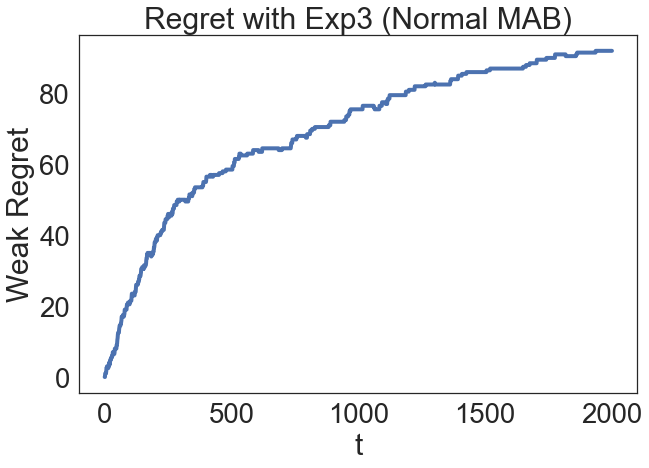

In [73]:
sns.set_theme(style="white", font_scale=2.5)
plt.figure(figsize=(10,6.6))
ax1 = sns.lineplot(x="t",y="regret",data=df, linewidth = 4)
ax1.set_title("Regret with Exp3 (Normal MAB)")
ax1.set_xlabel("t")
ax1.set_ylabel("Weak Regret")
ax1.figure.savefig("regret_normal.png")

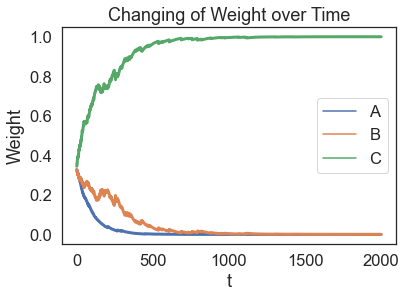

In [78]:
sns.set_theme(style="white", font_scale=1.5)
ax2 = sns.lineplot(x="t",y="weight",data=df_weight,hue="legend", linewidth = 3)
ax2.set_title("Changing of Weight over Time")
ax2.set_xlabel("t")
ax2.set_ylabel("Weight")
ax2.legend().set_title(title=None)
ax2.figure.savefig("weight_normal.png")

In [28]:
zz=[]
for i in range(1,T+1):
    

[ 201.5  999.  1799.5]


1799.5

In [81]:
df["reward"]

,t,reward,regret,action,action_group,method
0,1,1.0,0.0,2,C,exp3
1,2,1.0,0.0,2,C,exp3
2,3,0.0,1.0,0,A,exp3
3,4,1.0,1.0,2,C,exp3
4,5,1.0,1.0,2,C,exp3
...,...,...,...,...,...,...
1995,1996,1.0,92.0,2,C,exp3
1996,1997,1.0,92.0,2,C,exp3
1997,1998,1.0,92.0,2,C,exp3
1998,1999,1.0,92.0,2,C,exp3
